In [28]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/megandoiron/Desktop/Machine Learning/Heart_disease_statlog.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

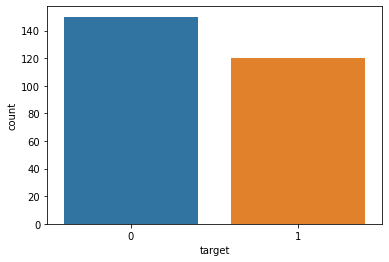

In [6]:
#is the dataset balanced?
sns.countplot('target', data = df)

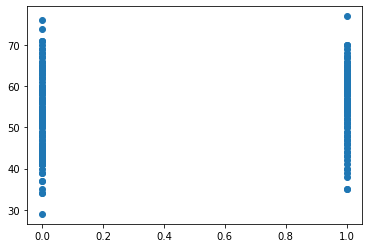

In [7]:
plt.scatter(df["target"], df["age"])

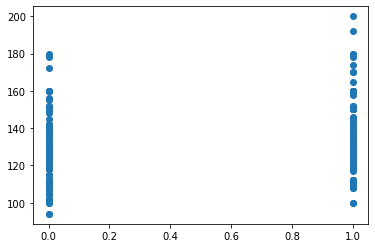

In [8]:
plt.scatter(df['target'], df['trestbps'])

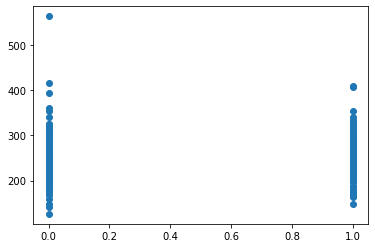

In [9]:
plt.scatter(df['target'], df['chol'])

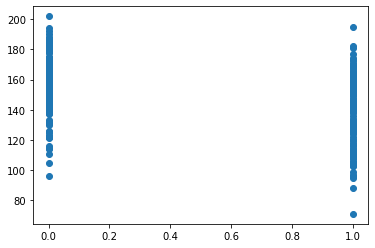

In [10]:
plt.scatter(df['target'], df['thalach'])

In [11]:
#I would like to keep all features to see what happens. 
# I don't believe that any feature engineering will be needed. 


In [12]:
def boxplots(df_column):
    plt.boxplot(df[f'{df_column}'])
    plt.title(f'Boxplot of {df_column}')
    plt.ylabel('value')
    return 

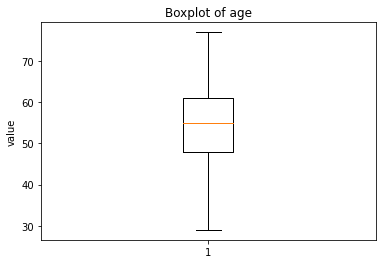

In [13]:
boxplots('age')

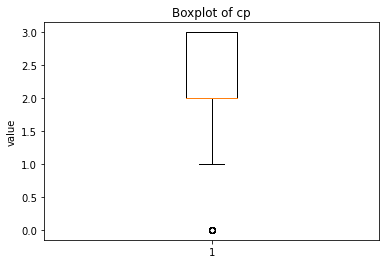

In [14]:
boxplots('cp')

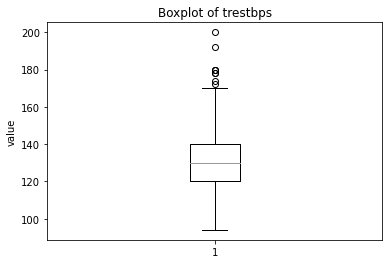

In [15]:
boxplots('trestbps')

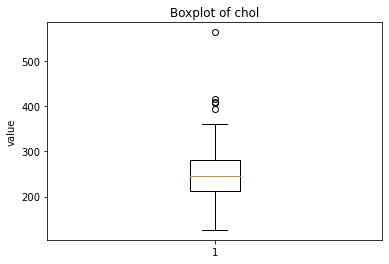

In [16]:
boxplots('chol')

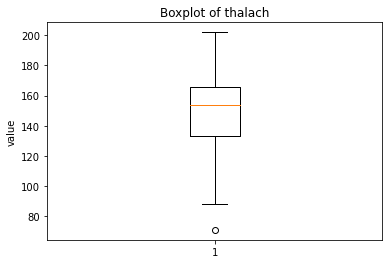

In [17]:
boxplots('thalach')

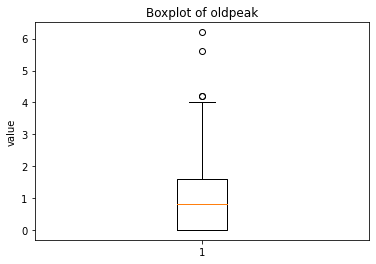

In [18]:
boxplots('oldpeak')

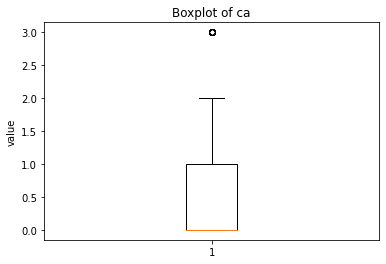

In [19]:
boxplots('ca')

In [20]:
def model_training(df, model_selection, model_string):
    X = df[['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
    y = df['target']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)
    
    model = model_selection
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(f'Test Accuracy of {model_string}: {accuracy_score(y_test, y_pred_test)}')
    print(f'Train Accuracy of {model_string}: {accuracy_score(y_train, y_pred_train)}')
    
    print(f'Classification Report of {model_string} on Test Data\n {classification_report(y_test, y_pred_test)}')
    
    print(f'Roc AUC Score of {model_string} on Test Data: {roc_auc_score(y_test, y_pred_test)}')
    return X_train, X_test, y_train, y_test, y_pred_test

In [21]:
X_train_log, X_test_log, y_train_log, y_test_log, y_pred_log = model_training(df, LogisticRegression(), 'Logistic Regression')

Test Accuracy of Logistic Regression: 0.8666666666666667
Train Accuracy of Logistic Regression: 0.8444444444444444
Classification Report of Logistic Regression on Test Data
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        51
           1       0.91      0.77      0.83        39

    accuracy                           0.87        90
   macro avg       0.88      0.86      0.86        90
weighted avg       0.87      0.87      0.86        90

Roc AUC Score of Logistic Regression on Test Data: 0.8552036199095022


/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc, y_pred_svc = model_training(df, SVC(), 'Support Vector Classifier')

Test Accuracy of Support Vector Classifier: 0.7
Train Accuracy of Support Vector Classifier: 0.6333333333333333
Classification Report of Support Vector Classifier on Test Data
               precision    recall  f1-score   support

           0       0.68      0.88      0.77        51
           1       0.75      0.46      0.57        39

    accuracy                           0.70        90
   macro avg       0.72      0.67      0.67        90
weighted avg       0.71      0.70      0.68        90

Roc AUC Score of Support Vector Classifier on Test Data: 0.6719457013574661


In [23]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf, y_pred_rf = model_training(df, RandomForestClassifier(), 'Random Forest Classifier')

Test Accuracy of Random Forest Classifier: 0.8555555555555555
Train Accuracy of Random Forest Classifier: 1.0
Classification Report of Random Forest Classifier on Test Data
               precision    recall  f1-score   support

           0       0.83      0.94      0.88        51
           1       0.91      0.74      0.82        39

    accuracy                           0.86        90
   macro avg       0.87      0.84      0.85        90
weighted avg       0.86      0.86      0.85        90

Roc AUC Score of Random Forest Classifier on Test Data: 0.8423831070889894


In [36]:
#grid search

def grid_search(model, params, Xtrain, ytrain, Xtest, ytest):
    
    params_grid= params
    
    grid = GridSearchCV(model, params_grid, cv = 5)
    
    grid.fit(Xtrain, ytrain)
    print(f'Best params: {grid.best_params_}')
    
    y_predict_test = grid.predict(Xtest)
    y_predict_train = grid.predict(Xtrain)
    
    print(f'Test Accuracy Score: {accuracy_score(y_predict_test, ytest)}')
    print(f'Train Accuracy Score: {accuracy_score(y_predict_train, ytrain)}')
    print(f'Test ROC AUC Score: {roc_auc_score(y_predict_test, ytest)}')
    return y_predict_test

In [48]:
y_predict_log = grid_search(LogisticRegression(), {
    'random_state' : [0],
    'solver'       : ['newton-cg', 'lbfgs'],
    'penalty'      : ['l2', 'none'],
    'C'            : [0.001, 0.01, 0.1, 1]},
    X_train_log, y_train_log, X_test_log, y_test_log
)

/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Best params: {'C': 0.1, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}
Test Accuracy Score: 0.8777777777777778
Train Accuracy Score: 0.8611111111111112
Test ROC AUC Score: 0.8911637931034483


/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/megandoiron/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [44]:
y_predict_svc = grid_search(SVC(), {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]},
    X_train_svc, y_train_svc, X_test_svc, y_test_svc)

Best params: {'C': 1, 'gamma': 0.001}
Test Accuracy Score: 0.7
Train Accuracy Score: 0.7722222222222223
Test ROC AUC Score: 0.695


In [37]:
y_predict_rf = grid_search(RandomForestClassifier(),{
    'n_estimators'     : [100, 300, 500],
    'max_depth'        : [5, 15, 30],
    'min_samples_split': [5, 15, 100],
    'random_state'     : [0]}, 
                X_train_rf, y_train_rf, X_test_rf, y_test_rf )

Best params: {'max_depth': 5, 'min_samples_split': 15, 'n_estimators': 300, 'random_state': 0}
Test Accuracy Score: 0.8666666666666667
Train Accuracy Score: 0.9222222222222223
Test ROC AUC Score: 0.8829961727720066


In [19]:
#models
#logisitis regression
# svc
# random forest


In [ ]:
#implement grid search for hyperparameters. 